In [2]:
!open .

In [3]:
import cv2
import numpy as np
#pip install opencv-contrib-python
import matplotlib.pyplot as plt

In [4]:
import os

In [17]:
import skimage.io

In [22]:
os.path.join('image_class/AN', 'a')

'image_class/AN/a'

In [5]:
os.listdir('image_class/AN')[0]

AttributeError: module 'os' has no attribute 'lsitdir'

In [55]:
len(os.listdir('image_class/AN'))

83

In [116]:
filepath = os.path.join('image_class/AN', os.listdir('image_class/AN')[1])

In [117]:
img = cv2.imread(filepath)

In [114]:
d = []

In [118]:
d.append(img)

In [91]:
img.shape

(1664, 1619, 3)

In [99]:
img.shape

(1664, 1619, 3)

In [174]:
dim = (1617, 1664)

In [175]:
data_positive = []
for path in os.listdir('image_class/AN'):
    filepath = os.path.join('image_class/AN', path)
    raw_img = cv2.imread(filepath)
    img = cv2.resize(raw_img, dim, interpolation = cv2.INTER_AREA)
    data_positive.append(img)

In [176]:
data_nevative = []
for path in os.listdir('image_class/AF'):
    filepath = os.path.join('image_class/AF', path)
    raw_img = cv2.imread(filepath)
    img = cv2.resize(raw_img, dim, interpolation = cv2.INTER_AREA)
    data_nevative.append(img)

In [81]:
len(os.listdir('image_class/AN'))

83

In [199]:
data_nevative[0].shape

(1664, 1617, 3)

In [200]:
data_positive[0].shape

(1664, 1617, 3)

In [201]:
data_positive.extend(data_nevative)

In [202]:
data = data_positive

In [203]:
len(data)

176

In [ ]:
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [177]:
target = ([1] *83) + ([0] * len(os.listdir('image_class/AF')))

In [181]:
n_samples = len(data_nevative)

In [204]:
d = np.asarray(data)

In [205]:
d[0].shape

(1664, 1617, 3)

In [206]:
d[0].shape

(1664, 1617, 3)

In [207]:
len(d)

176

In [214]:
td = d.reshape(176,8072064)

In [215]:
td.shape

(176, 8072064)

In [216]:
1664* 1617* 3

8072064

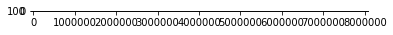

In [218]:
plt.imshow(td)

In [220]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


In [221]:
classifier = svm.SVC(gamma=0.001)


In [232]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    td, target, test_size=0.5, shuffle=True)

In [233]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
predicted = classifier.predict(X_test)


In [ ]:
predicted